## **Kaggle Competicion** 
### Store Sales - Time Series Forecasting

In [1]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
holidays_events = pd.read_csv('./holidays_events.csv')
oil = pd.read_csv('./oil.csv')
sample_submission = pd.read_csv('./sample_submission.csv')
stores = pd.read_csv('./stores.csv')
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
transactions = pd.read_csv('./transactions.csv')

### 1. EDA 

* Identificamos por los datos proporcionados y el estudio realizado en los datos, la variable objetivo es "sales", por lo que enfocamos todo el estudio a predecir esta variable lo mejor posible y como todas las variables son capaces de predecir esta.

In [3]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


#### 1.1 Columnas

In [4]:
train.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
- store_nbr = identifies the store at which the products are sold.
- family = identifies the type of product sold.
- sales = gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in - fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- onpromotion = gives the total number of items in a product family that were being promoted at a store at a given date.

#### 1.2 Estadísticas Descriptivas:

In [5]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


1. Venta minima = 0 unidades 
2. Venta maxima =  124,717 unidades
3. La media me dice que se venden 358 unidades por dia
4. El 26% de las ventas se realizaron onpromotion
5. Vemos que tengo una media de 358 unidades  y la mediana (percentil 50%) es de 11 unidades [Se observa una discrepancia entre la media y la mediana de las ventas. Mientras que la media de 358 unidades sugiere un valor promedio relativamente alto, la mediana de 11 unidades indica que la mitad de las observaciones tienen un valor igual o inferior a 11 unidades. Esta discrepancia sugiere una posible presencia de valores extremos o sesgo en la distribución de las ventas]

#### 1.3 Tipos de Datos:

In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


- date es de tipo object (Hay que convertirlo a tipo datetime)
- sales es float, lo que esta bien ya que puede contener decimales
- onpromotion es de tipo entero, pero es binaria, por lo que puede ser mejor pasarlo a tipo booleano

## 2.1 Visualizacion de datos 


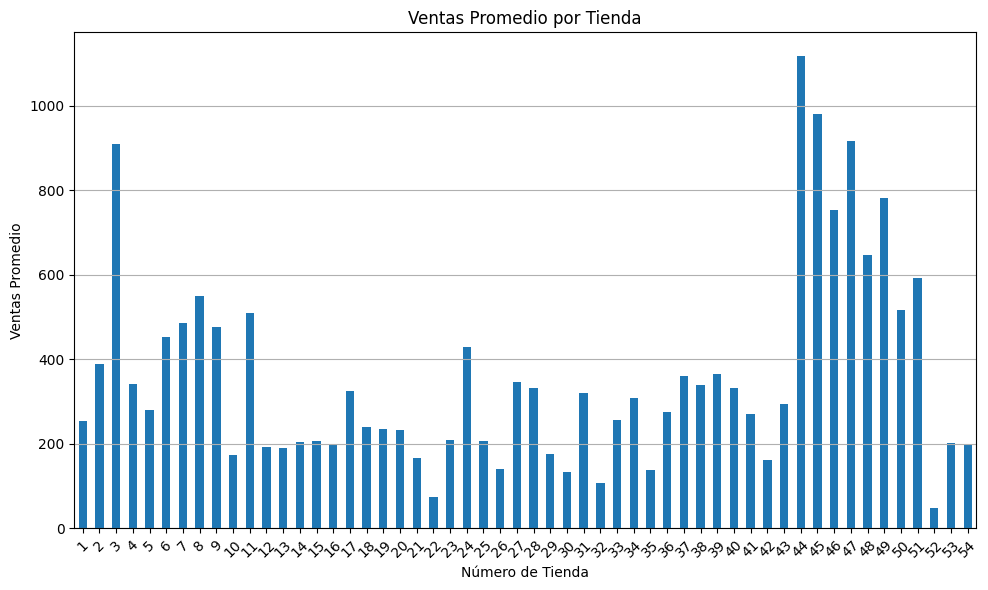

In [7]:
# Calcula las ventas promedio por tienda
ventas_promedio_por_tienda = train.groupby('store_nbr')['sales'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_promedio_por_tienda.plot(kind='bar')
plt.title('Ventas Promedio por Tienda')
plt.xlabel('Número de Tienda')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Añade líneas de referencia horizontal
plt.tight_layout()  # Ajusta la disposición del gráfico
plt.show()

Del gráfico de barras que muestra las ventas promedio por tienda, podrías extraer varias conclusiones y observaciones, como:

- Variabilidad en las Ventas: Observarás que algunas tiendas tienen ventas promedio más altas que otras. Esto puede indicar diferencias en el desempeño de las tiendas o en las estrategias de ventas.

- Identificación de Tiendas Destacadas: Puedes identificar tiendas que sobresalen en términos de ventas promedio. Estas tiendas podrían ser objeto de un análisis más detallado para comprender qué prácticas o factores contribuyen a su éxito.

- Identificación de Tiendas con Bajas Ventas: Del mismo modo, puedes identificar tiendas que tienen ventas promedio más bajas. Estas tiendas podrían requerir una atención especial para mejorar su desempeño.

- Patrones de Ventas por Tienda: Puedes observar patrones o tendencias en las ventas promedio a lo largo de las tiendas. Por ejemplo, algunas tiendas podrían tener ventas consistentemente altas o bajas, mientras que otras podrían mostrar fluctuaciones estacionales o tendencias a lo largo del tiempo.

- Comparación con Metas o Expectativas: Puedes comparar las ventas promedio de cada tienda con metas o expectativas previamente establecidas para evaluar su desempeño en relación con los objetivos de ventas.

#### Visualizar las Ventas a lo Largo del Tiempo:

In [8]:
# Convierte la columna 'date' a tipo datetime si no está en ese formato
train['date'] = pd.to_datetime(train['date'])

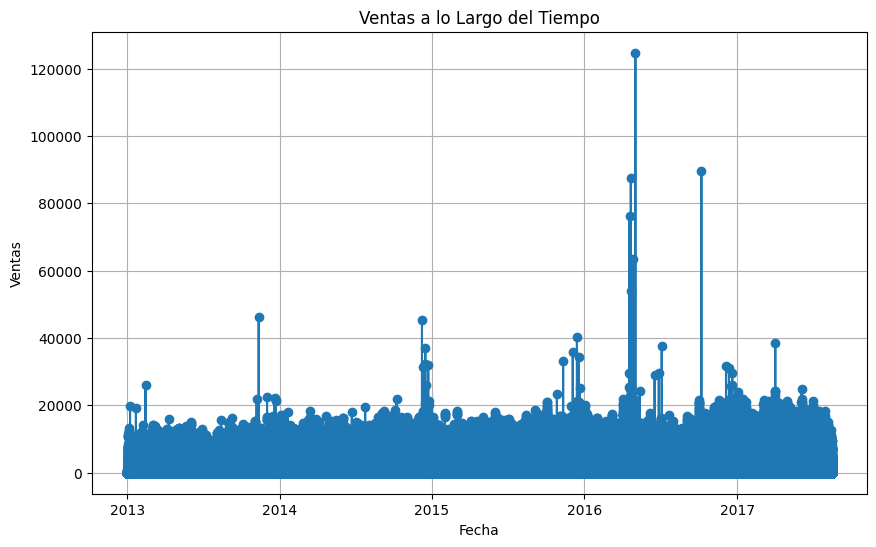

In [9]:
# Crea un gráfico de líneas para visualizar las ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(train['date'], train['sales'], marker='o', linestyle='-')
plt.title('Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

### Gráfico de Dispersión para Explorar Relaciones entre Variables:

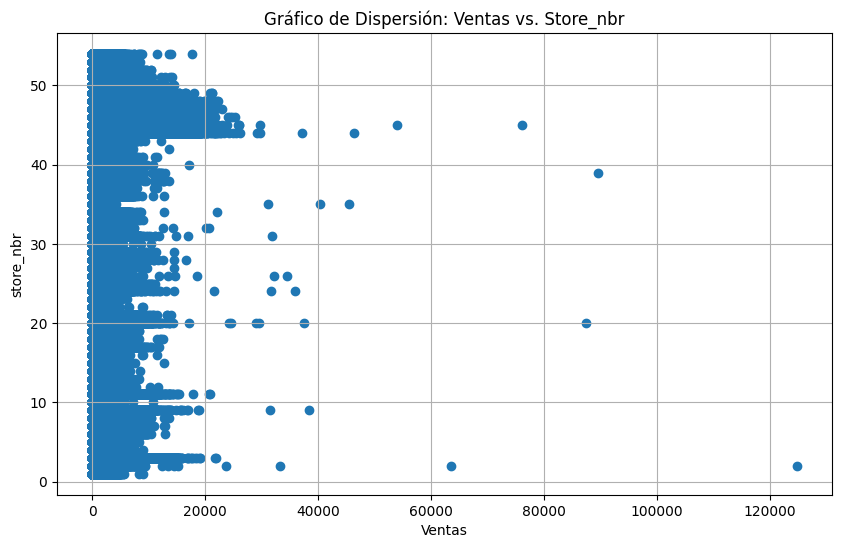

In [10]:
# Crea un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(train['sales'], train['store_nbr'])
plt.title('Gráfico de Dispersión: Ventas vs. Store_nbr')
plt.xlabel('Ventas')
plt.ylabel('store_nbr')
plt.grid(True)
plt.show()

- Concentración de datos: Hay una gran concentración de puntos alrededor del eje y, lo que sugiere que hay muchas tiendas con un número bajo de ventas.

- Outliers: Hay algunos puntos dispersos hacia la derecha del gráfico que representan tiendas con ventas significativamente más altas que el resto.

- Rango de ventas: Las ventas varían desde muy pequeñas hasta más de 120,000 unidades, con la mayoría de las tiendas agrupadas en el rango más bajo.

- Número de tiendas: El número de tienda parece estar asignado en un rango de 1 a aproximadamente 54.

- Distribución de ventas por tienda: No hay una tendencia clara o patrón que relacione el número de la tienda con las ventas. Esto puede indicar que el número de tienda no es un factor que afecte directamente las ventas.

- Posibles grupos de tiendas: Puede haber grupos de tiendas con desempeños similares en ventas, como se ve por la aparición de "líneas horizontales" de puntos a ciertos niveles de ventas.

- Ausencia de correlación lineal: No parece haber una correlación lineal entre las ventas y el número de tienda. Si el número de tienda representara algo como la antigüedad o el tamaño, no se ve una relación directa con el volumen de ventas.

### Matriz de Correlacion

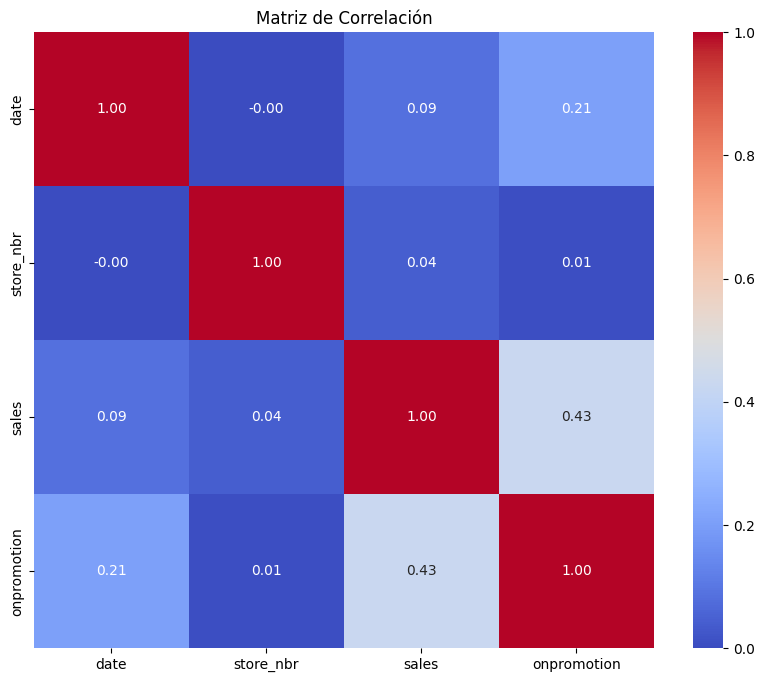

In [11]:
# Selecciona solo las columnas 'store_nbr', 'sales' y 'onpromotion'
selected_columns = train[['date','store_nbr', 'sales', 'onpromotion']]

# Calcula la matriz de correlación
correlation_matrix = selected_columns.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

- La presencia de una correlación moderada entre 'sales' y 'onpromotion' no significa que 'onpromotion' sea un predictor perfecto de 'sales', pero sí sugiere que podría haber algún tipo de relación. Las otras variables, como 'store_nbr', que muestran correlaciones bajas con 'sales', podrían no ser predictores útiles por sí solas. Sin embargo, esto no significa que sean completamente irrelevantes; podrían influir en las ventas en combinación con otras variables o en ciertos contextos que una matriz de correlación no puede capturar. Por ejemplo, podría ser que ciertos números de tiendas correspondan a ubicaciones específicas con patrones de ventas únicos que una correlación no revela directamente.

## 3.1 Identificación de Valores Atípicos:

#### Histogramas 

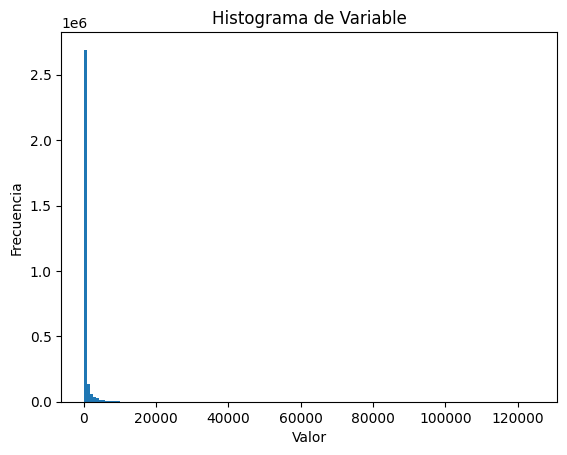

In [12]:
plt.hist(train['sales'], bins=150)  # Ajusta el número de bins según tus datos
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Variable')
plt.show()

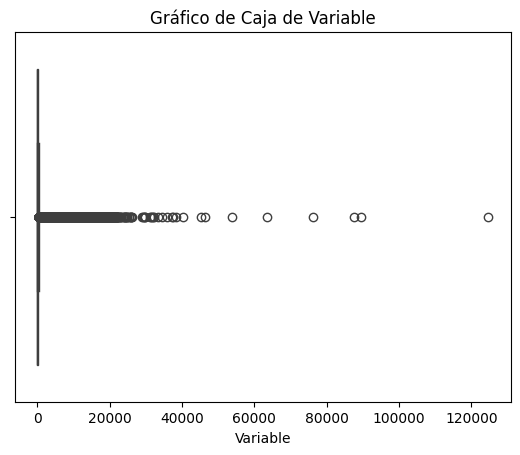

In [13]:
sns.boxplot(x=train['sales'])
plt.xlabel('Variable')
plt.title('Gráfico de Caja de Variable')
plt.show()

## 4.1 Tratamiento de valores atipicos

In [14]:
# Calcula el primer y tercer cuartil (Q1 y Q3)
Q1 = train['sales'].quantile(0.25)
Q3 = train['sales'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites superior e inferior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los valores atípicos y crea un nuevo DataFrame sin ellos
train_without_outliers = train[(train['sales'] >= lower_bound) & (train['sales'] <= upper_bound)]
train_without_outliers.describe()

,id,date,store_nbr,sales,onpromotion
count,2.553783e+06,2553783,2.553783e+06,2.553783e+06,2.553783e+06
mean,1.472429e+06,2015-04-08 14:22:29.370403840,2.732917e+01,5.874689e+01,8.232571e-01
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.159535e+05,2014-02-07 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.457348e+06,2015-03-31 00:00:00,2.700000e+01,5.000000e+00,0.000000e+00
75%,2.223852e+06,2016-06-04 00:00:00,4.000000e+01,6.108500e+01,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,4.896150e+02,2.790000e+02
std,8.682923e+05,NaN,1.537488e+01,1.065165e+02,4.448644e+00


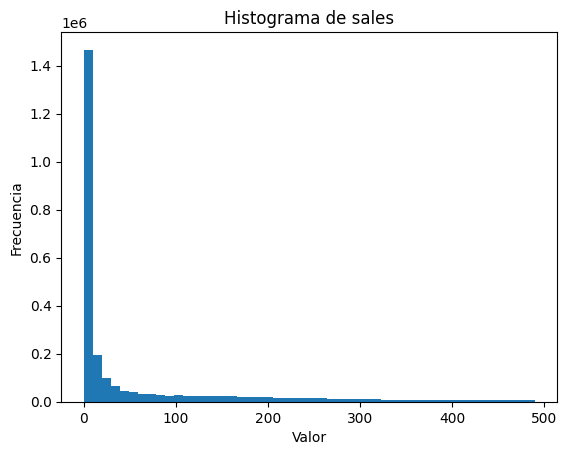

In [15]:
plt.hist(train_without_outliers['sales'], bins=50)  # Ajusta el número de bins según tus datos
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de sales')
plt.show()

## 4.2 Tratamiento de Datos Faltantes:

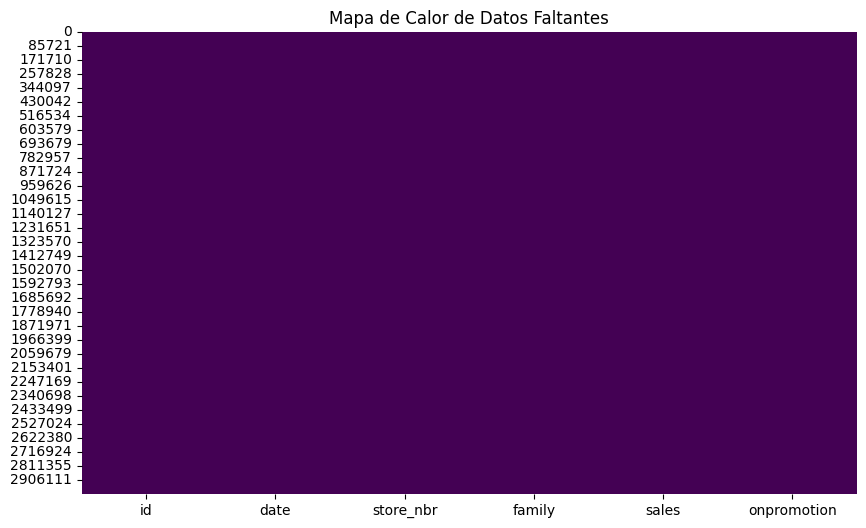

In [16]:
# Crea un mapa de calor para visualizar los datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(train_without_outliers.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

In [17]:
# Calcula la cantidad de valores faltantes en cada columna
missing_count = train_without_outliers.isnull().sum()

# Calcula el porcentaje de valores faltantes en cada columna
missing_percentage = (missing_count / len(train_without_outliers)) * 100

# Combina los resultados en un DataFrame para facilitar la visualización
missing_info = pd.DataFrame({'Cantidad Faltante': missing_count, 'Porcentaje Faltante': missing_percentage})
print(missing_info)


             Cantidad Faltante  Porcentaje Faltante
id                           0                  0.0
date                         0                  0.0
store_nbr                    0                  0.0
family                       0                  0.0
sales                        0                  0.0
onpromotion                  0                  0.0


In [18]:
train_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2553783 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 136.4+ MB


### 5.1 Codificamos "family" y eliminamos columnas innecesarias 

 #### 5.2 Eliminamos la columna ID

In [19]:
train_without_outliers.drop('id', axis=1, inplace=True)
train_without_id= train_without_outliers
train_without_id

C:\Users\ivoto\AppData\Local\Temp\ipykernel_13876\1617124037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_without_outliers.drop('id', axis=1, inplace=True)


,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [20]:
train_without_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2553783 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 116.9+ MB


 ### 5.3 Codificicamos 'family'

In [21]:
# Suponiendo que 'train' es tu DataFrame y 'family' es la columna a codificar
train_one_hot = pd.get_dummies(train_without_id, columns=['family'], drop_first=True)
train_one_hot

,date,store_nbr,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,2013-01-01,1,0.000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2013-01-01,1,0.000,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2013-01-01,1,0.000,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2013-01-01,1,0.000,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2013-01-01,1,0.000,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000882,2017-08-15,9,6.000,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3000883,2017-08-15,9,438.133,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3000884,2017-08-15,9,154.553,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3000886,2017-08-15,9,121.000,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### 6.1 Analisis de otros Data sets

In [22]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


- Información de las tiendas (stores.csv): Incluye store_nbr (número de tienda), city, state, type y cluster.
- Para integrar estos dos conjuntos de datos, usaremos el "store_nbr" como **clave** para unirlos. Esto añadirá los detalles de cada tienda (como city, state, type, cluster) a cada fila correspondiente en el conjunto de datos de entrenamiento, proporcionando más información sobre el contexto de cada tienda.

In [23]:
# Integrar la información de las tiendas con los datos de entrenamiento
train_stores_df = pd.merge(train_one_hot, stores, on='store_nbr', how='left')
# Mostrar las primeras filas del nuevo dataframe para verificar la integración
train_stores_df.head()

,date,store_nbr,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,city,state,type,cluster
0,2013-01-01,1,0.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,Quito,Pichincha,D,13
1,2013-01-01,1,0.0,0,True,False,False,False,False,False,...,False,False,False,False,False,False,Quito,Pichincha,D,13
2,2013-01-01,1,0.0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,Quito,Pichincha,D,13
3,2013-01-01,1,0.0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,Quito,Pichincha,D,13
4,2013-01-01,1,0.0,0,False,False,False,True,False,False,...,False,False,False,False,False,False,Quito,Pichincha,D,13


In [24]:
# Codificamos las variables categoricas de store

# Aplicar la codificación one-hot y eliminar la primera columna dummy de cada variable codificada
train_with_storesInfo = pd.get_dummies(train_stores_df, columns=['city', 'state', 'type'], drop_first=True)
train_with_storesInfo.head()

,date,store_nbr,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_B,type_C,type_D,type_E
0,2013-01-01,1,0.0,0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,2013-01-01,1,0.0,0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2013-01-01,1,0.0,0,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,2013-01-01,1,0.0,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,2013-01-01,1,0.0,0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


## 6.1 Preparacion y entrenamiento de los datos

In [25]:
#Importamos librerias 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

### 6.2 Dividimos el conjunto conjunto de entrenamiento

In [26]:
# Suponiendo que 'train_with_storesInfo' es tu DataFrame completo y 'sales' es tu variable objetivo
X = train_with_storesInfo.drop(columns=['sales'])  # Todas las características, excluyendo la variable objetivo
y = train_with_storesInfo['sales']  # La variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Convertir la fecha a un número entero utilizando toordinal()
X_train['date_ordinal'] = X_train['date'].apply(lambda x: x.toordinal())
X_test['date_ordinal'] = X_test['date'].apply(lambda x: x.toordinal())

# Eliminar la columna original de fecha si ya no es necesaria
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787648 entries, 718653 to 2219110
Data columns (total 76 columns):
 #   Column                                Dtype
---  ------                                -----
 0   store_nbr                             int64
 1   onpromotion                           int64
 2   family_BABY CARE                      bool 
 3   family_BEAUTY                         bool 
 4   family_BEVERAGES                      bool 
 5   family_BOOKS                          bool 
 6   family_BREAD/BAKERY                   bool 
 7   family_CELEBRATION                    bool 
 8   family_CLEANING                       bool 
 9   family_DAIRY                          bool 
 10  family_DELI                           bool 
 11  family_EGGS                           bool 
 12  family_FROZEN FOODS                   bool 
 13  family_GROCERY I                      bool 
 14  family_GROCERY II                     bool 
 15  family_HARDWARE                       bool 
 16  

### 6.3 Entrenamos el conjunto de entrenamiento

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define el modelo base
random_forest = RandomForestRegressor(random_state=42)

# Define el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100],
    'max_depth': [30],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'max_features': ['sqrt']
}

# Configura la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ejecuta la búsqueda
grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores hiperparámetros: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [30]:
# Predicciones con el modelo entrenado
y_pred = grid_search.best_estimator_.predict(X_test)

In [31]:
# Evaluación del modelo
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)

RMSLE: 1.2785034754825135


###  Prediccion con LightGBM

In [32]:
#Cambiamos el nombre de las columnas para que LightGBN las interprete
# Limpiar nombres de las columnas
X_train.columns = X_train.columns.str.replace(' ', '_').str.replace(',', '')
X_test.columns = X_test.columns.str.replace(' ', '_').str.replace(',', '')
X_train.columns = X_train.columns.str.strip()  # Eliminar espacios al inicio y al final
X_test.columns = X_test.columns.str.strip()  # Eliminar espacios al inicio y al final
# Opcional: Reemplazar espacios con guiones bajos (si los hubiera)
X_train.columns = X_train.columns.str.replace('/', '')
X_test.columns = X_test.columns.str.replace('/', '')



X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766135 entries, 391989 to 640608
Data columns (total 76 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   store_nbr                             766135 non-null  int64
 1   onpromotion                           766135 non-null  int64
 2   family_BABY_CARE                      766135 non-null  bool 
 3   family_BEAUTY                         766135 non-null  bool 
 4   family_BEVERAGES                      766135 non-null  bool 
 5   family_BOOKS                          766135 non-null  bool 
 6   family_BREADBAKERY                    766135 non-null  bool 
 7   family_CELEBRATION                    766135 non-null  bool 
 8   family_CLEANING                       766135 non-null  bool 
 9   family_DAIRY                          766135 non-null  bool 
 10  family_DELI                           766135 non-null  bool 
 11  family_EGGS               

In [34]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define el modelo base
lgbm = lgb.LGBMRegressor(random_state=42)

# Define el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20, 30],  # -1 significa sin límite
    'num_leaves': [31, 50, 100],    # Debe ser menor que 2^max_depth
    'min_child_samples': [20, 50, 100],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1],          # Porcentaje de datos usados para entrenar cada árbol
    'colsample_bytree': [0.8, 1]    # Porcentaje de características usadas por árbol
}

# Configura la búsqueda en cuadrícula
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ejecuta la búsqueda (asegúrate de tener X_train y y_train definidos como tus datos de entrenamiento)
grid_search_lgbm.fit(X_train, y_train)

# Muestra los mejores parámetros
print("Mejores hiperparámetros:", grid_search_lgbm.best_params_)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 566
[LightGBM] [Info] Number of data points in the train set: 1787648, number of used features: 76
[LightGBM] [Info] Start training from score 58.756700
Mejores hiperparámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 100, 'subsample': 0.8}


Mejores hiperparámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 100, 'subsample': 0.8}

In [35]:
y_pred = grid_search_lgbm.best_estimator_.predict(X_test)

* Por qué usar RMSLE
RMSLE es útil cuando no quieres que los errores grandes en las predicciones de valores absolutamente grandes sean penalizados tanto como los errores en valores pequeños. Esto es especialmente relevante en problemas donde los errores en predicciones de valores pequeños y grandes tienen implicaciones muy diferentes.

Por ejemplo, en la predicción de ventas, subestimar significativamente las ventas cuando se esperan pocas unidades puede ser más problemático que hacerlo para un producto de alta venta. RMSLE penaliza más los errores porcentuales, lo que significa que predecir 10 cuando el valor real es 20 se considera más grave que predecir 1010 cuando el valor real es 1020, a pesar de que la diferencia absoluta es la misma.

In [36]:
# Ahora puedes calcular RMSLE de manera segura
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.